In [1]:
import re
import os
from os import path

import numpy as np
import pandas as pd
import sympy as sp
from sympy import symbols as s
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from lab_tools import graph, lab_round

%matplotlib widget

width = 469.75502 # To get the page width insert "\the\textwidth" in your LaTeX document
here_path = path.abspath('') # path.dirname(__file__)
graph_path = path.join(here_path, "../images/")
data_path = path.join(here_path, "../data/")

mpl.rcParams.update({
    # Show minor ticks
    "ytick.minor.visible": True,
    "xtick.minor.visible": True,
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    # High resolution .png
    "savefig.dpi": 600,
    "savefig.bbox": "tight",
    # Default image size
    "figure.figsize": graph.size(width),
})

In [2]:
wave_length = 650 / 10**9

slits = [0.02, 0.04, 0.08]
sensors = [0.5, 1.0, 1.5]

slit_name = 0.08
slit = slit_name / 10**3
slit_pos = 4 / 10**2

sensor_name = 1.5
sensor = sensor_name / 10**3
sensor_pos = 102.5 / 10**2

distance = sensor_pos - slit_pos

Fit function

In [3]:
I_expr = s('I_0') * sp.Pow( sp.sinc(sp.pi * s('a') / s(r'\lambda') * s('y')/s('L')), 2)
I_expr

I_0*sinc(pi*a*y/(L*\lambda))**2

In [4]:
I_fit = sp.lambdify(
    [s('y'), s('I_0'), s('a')],
    I_expr.evalf(
        subs = {
            s(r'\lambda'): wave_length,
            s('L'): distance,
        }
    )
)

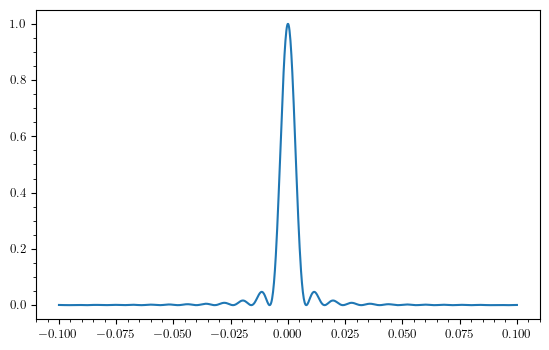

In [5]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(-0.1, 0.1, 1000)
ax.plot(x, I_fit(x, 1, slit))

In [6]:
files_15 = [
    file
    for file in os.listdir(path.join(data_path, "raw"))
    if re.search(f"\\w+ {slit_name:.2f} {1.5:.1f}.tsv", file)
]

dfs_15 = [
    pd.read_csv(
        path.join(data_path, "raw", file),
        sep='\t',
        engine='python',
    )
    for file in files_15
]

files_10 = [
    file
    for file in os.listdir(path.join(data_path, "raw"))
    if re.search(f"\\w+ {slit_name:.2f} {1.0:.1f}", file)
]

dfs_10 = [
    pd.read_csv(
        path.join(data_path, "raw", file),
        sep='\t',
        engine='python',
    )
    for file in files_10
]

files_05 = [
    file
    for file in os.listdir(path.join(data_path, "raw"))
    if re.search(f"\\w+ {slit_name:.2f} {0.5:.1f}.tsv", file)
]

dfs_05 = [
    pd.read_csv(
        path.join(data_path, "raw", file),
        sep='\t',
        engine='python',
    )
    for file in files_05
]


for df in dfs_15 + dfs_10 + dfs_05:
    df.y -= df.y.min()
    df.y -= 8.12
    # df.I -= df.I.min()


Fit

I_0 = 15.1517423842789 +/- 0.02579455084511857
a_0 = 0.08041854358668268 +/- 0.00014341918310698494
I_1 = 12.587286819316384 +/- 0.026974846617700596
a_1 = 0.08403123757185266 +/- 0.00020213801283504952
I_2 = 13.879173876008736 +/- 0.02316119673887404
a_2 = 0.0827414111467915 +/- 0.00014120356314484224
I_0 = 11.113995422595071 +/- 0.04835946237078609
a_0 = 0.07780793489577723 +/- 0.00038100954377109355
I_0 = 6.178174317064945 +/- 0.018698401300432738
a_0 = 0.08633442900946485 +/- 0.00027642566593727197


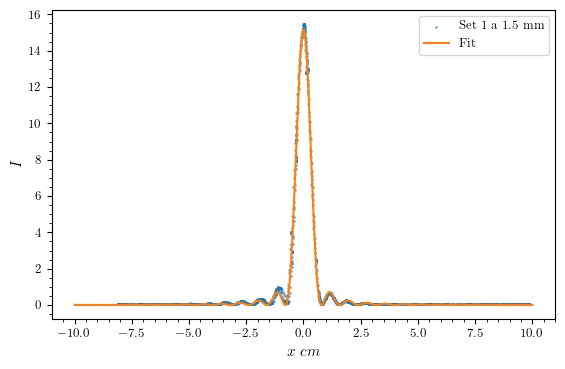

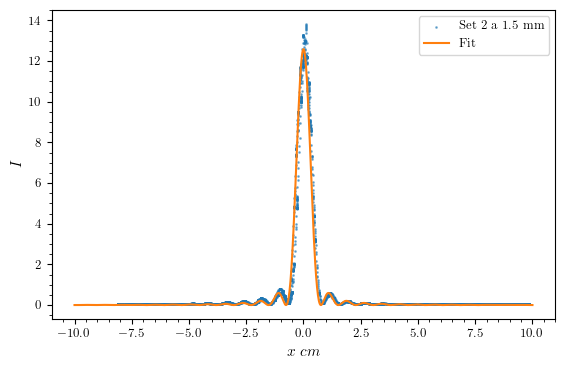

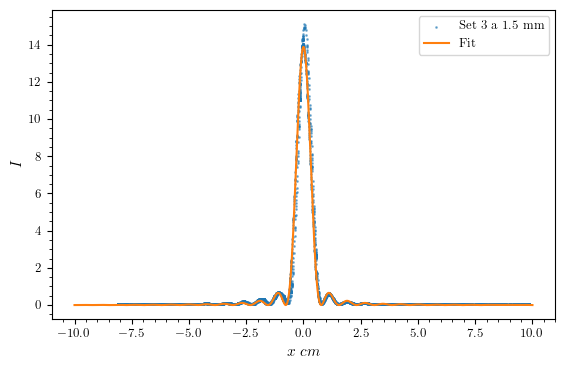

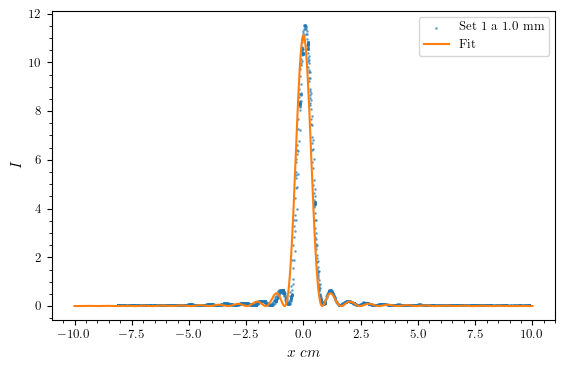

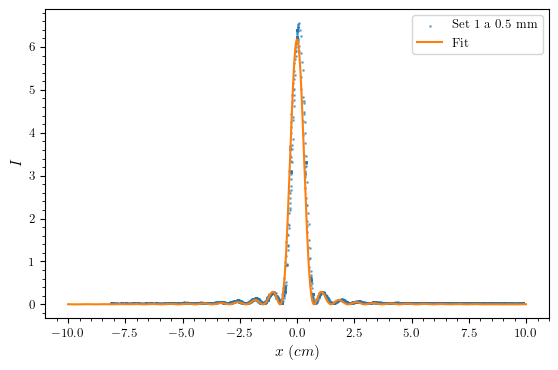

In [7]:
for i, df in enumerate(dfs_15):
    (I_fitted, a_fitted), pcov = curve_fit(I_fit, df.y / 100, df.I, [df.I.max(), slit])
    I_err, a_err = np.sqrt(np.diag(pcov))
    print(f"I_{i} = {I_fitted} +/- {I_err}")
    print(f"a_{i} = {a_fitted * 10**3} +/- {a_err * 10**3}")

    fig, ax = plt.subplots(1, 1)

    x = np.linspace(-0.1, 0.1, 1000)
    ax.scatter(df.y, df.I, s=1, alpha = 0.5, label=f"Set {i+1} a 1.5 mm")
    ax.plot(x * 100, I_fit(x, I_fitted, a_fitted), color="tab:orange", label="Fit")

    ax.set_xlabel("$x \; cm$")
    ax.set_ylabel("$I$")

    ax.legend()

for i, df in enumerate(dfs_10):
    (I_fitted, a_fitted), pcov = curve_fit(I_fit, df.y / 100, df.I, [df.I.max(), slit])
    I_err, a_err = np.sqrt(np.diag(pcov))
    print(f"I_{i} = {I_fitted} +/- {I_err}")
    print(f"a_{i} = {a_fitted * 10**3} +/- {a_err * 10**3}")

    fig, ax = plt.subplots(1, 1)

    x = np.linspace(-0.1, 0.1, 1000)
    ax.scatter(df.y, df.I, s=1, alpha = 0.5, label=f"Set {i+1} a 1.0 mm")
    ax.plot(x * 100, I_fit(x, I_fitted, a_fitted), color="tab:orange", label="Fit")

    ax.set_xlabel("$x \; cm$")
    ax.set_ylabel("$I$")

    ax.legend()

for i, df in enumerate(dfs_05):
    (I_fitted, a_fitted), pcov = curve_fit(I_fit, df.y / 100, df.I, [df.I.max(), slit])
    I_err, a_err = np.sqrt(np.diag(pcov))
    print(f"I_{i} = {I_fitted} +/- {I_err}")
    print(f"a_{i} = {a_fitted * 10**3} +/- {a_err * 10**3}")

    fig, ax = plt.subplots(1, 1)

    x = np.linspace(-0.1, 0.1, 1000)
    ax.scatter(df.y, df.I, s=1, alpha = 0.5, label=f"Set {i+1} a 0.5 mm")
    ax.plot(x * 100, I_fit(x, I_fitted, a_fitted), color="tab:orange", label="Fit")

    ax.set_xlabel("$x \; (cm)$")
    ax.set_ylabel("$I$")

    ax.legend()

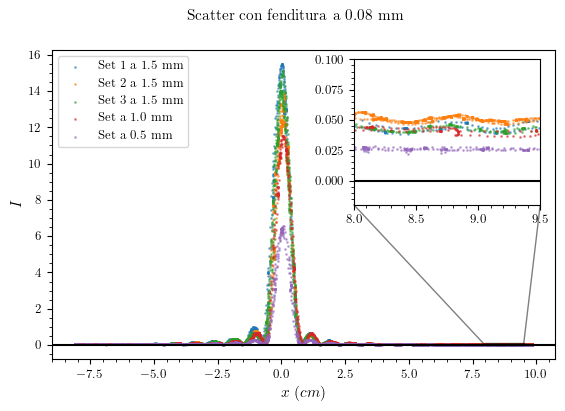

In [8]:
fig, ax = plt.subplots(1, 1)
fig.suptitle(f"Scatter con fenditura a {slit_name} mm", fontsize=11)

for i, df in enumerate(dfs_15):
    ax.scatter(df.y, df.I, s=1, alpha = 0.5, label=f"Set {i+1} a 1.5 mm")
for df in dfs_10:
    ax.scatter(df.y, df.I, s=1, alpha = 0.5, label=f"Set a 1.0 mm")
for df in dfs_05:
    ax.scatter(df.y, df.I, s=1, alpha = 0.5, label=f"Set a 0.5 mm")

xlim = ax.get_xlim()
ax.plot(xlim, [0, 0], c="black")

ax_noise = ax.inset_axes([0.6, 0.5, 0.37, 0.47])
ax_noise.set_xlim(8, 9.5)
ax_noise.set_ylim(-0.02, 0.1)
ax.indicate_inset_zoom(ax_noise, edgecolor="black")

for i, df in enumerate(dfs_15):
    ax_noise.scatter(df.y, df.I, s=1, alpha = 0.5, label=f"Set {i+1} a 1.5 mm")
for df in dfs_10:
    ax_noise.scatter(df.y, df.I, s=1, alpha = 0.5, label=f"Set a 1.0 mm")
for df in dfs_05:
    ax_noise.scatter(df.y, df.I, s=1, alpha = 0.5, label=f"Set a 0.5 mm")

ax_noise.plot(xlim, [0, 0], c="black")

ax.set_xlabel("$x \; (cm)$")
ax.set_ylabel("$I$")

ax.legend()
ax.set_xlim(xlim)

fig.savefig(path.join(graph_path, f"scatter_{slit_name}.png"))